In [ ]:
# %pip install nbformat
# %pip install ipywidgets
# %pip install yfinance
# %pip install seaborn
# %pip install scipy
# %pip install matplotlip
# %pip install scikit-learn
# %pip install scikit-optimize
# %pip install joblib
# %pip install plotly
# %pip install jupyter ipython django-extensions
# %pip install pandas-profiling
# %pip install skforecast==0.5.1
# %pip install pandas==1.3.4
# %pip install statsmodels==0.13.2
# %pip install pandas-profiling==3.2.0
# %pip install pyspark
# %pip install numpy
# %pip install pandas-datareader
# %pip install tabulate

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Data Preparation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# sklearn Regressor Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# sklearn Evaluation Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# skforecast Library
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from joblib import dump, load

# import EDA library
from pandas_profiling import ProfileReport

# import Visualisation library
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.simplefilter("ignore", UserWarning)


visions.backends INFO  Pandas backend loaded 1.3.4
visions.backends INFO  Numpy backend loaded 1.23.0
visions.backends INFO  Pyspark backend NOT loaded
visions.backends INFO  Python backend loaded


[*********************100%***********************]  1 of 1 completed
╒══════════╤═════════════╤════════════╕
│ Metric   │   SVR Train │   SVR Test │
╞══════════╪═════════════╪════════════╡
│ R2 Score │  0.735453   │ -0.620251  │
├──────────┼─────────────┼────────────┤
│ MSE      │  0.00297058 │  0.0607004 │
├──────────┼─────────────┼────────────┤
│ MAE      │  0.0483212  │  0.226754  │
╘══════════╧═════════════╧════════════╛
╒══════════╤═════════════╤════════════╕
│ Metric   │   RFR Train │   RFR Test │
╞══════════╪═════════════╪════════════╡
│ R2 Score │ 0.999998    │  -1.79996  │
├──────────┼─────────────┼────────────┤
│ MSE      │ 2.11817e-08 │   0.104897 │
├──────────┼─────────────┼────────────┤
│ MAE      │ 3.38696e-05 │   0.264054 │
╘══════════╧═════════════╧════════════╛
[*********************100%***********************]  1 of 1 completed
╒══════════╤═════════════╤════════════╕
│ Metric   │   SVR Train │   SVR Test │
╞══════════╪═════════════╪════════════╡
│ R2 Score │  0.746645

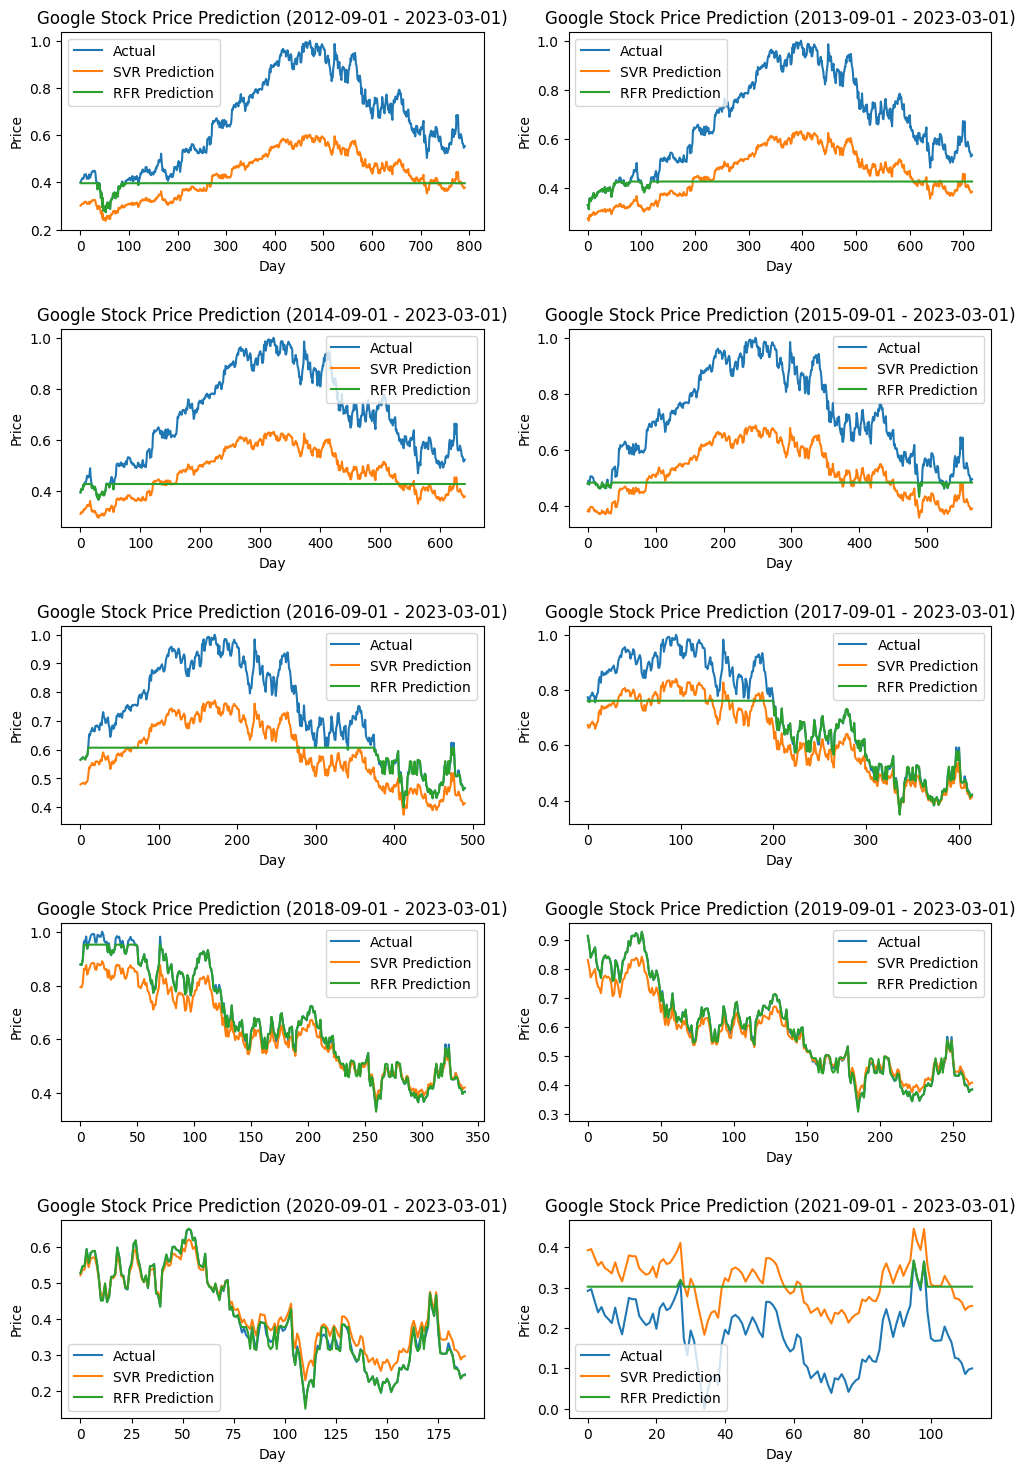

In [4]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tabulate import tabulate


# Set end date for historical price data
end_date = '2023-03-01'

# Set different start dates
start_dates = ['2012-09-01', '2013-09-01', '2014-09-01',
               '2015-09-01', '2016-09-01', '2017-09-01',
               '2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01']

# Create a 5 x 2 subplot grid
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
for i, start_date in enumerate(start_dates):
    df = yf.download("GOOGL", start=start_date, end=end_date)

    # Drop unnecessary columns
    df.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df)

    # Split the data into training and testing sets
    train_size = int(len(df_scaled) * 0.7)
    train_data, test_data = df_scaled[0:train_size,
                                      :], df_scaled[train_size:len(df_scaled), :]

    # Split the data into input (X) and output (y) variables
    X_train, y_train = train_data[:, 1:], train_data[:, 0]
    X_test, y_test = test_data[:, 1:], test_data[:, 0]

    # Build SVR model
    svr_model = SVR(kernel='linear', C=100, gamma='auto')
    svr_model.fit(X_train, y_train)

    # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rfr_model.fit(X_train, y_train)

    # Test the models and visualize the results in the corresponding subplot
    # Evaluate SVR model
    y_svr_train_pred = svr_model.predict(X_train)
    y_svr_test_pred = svr_model.predict(X_test)

    # Evaluate RFR model
    y_rfr_train_pred = rfr_model.predict(X_train)
    y_rfr_test_pred = rfr_model.predict(X_test)

    row_index = i // 2  # row index for the subplot grid
    col_index = i % 2  # column index for the subplot grid

    axs[row_index][col_index].plot(y_test, label='Actual')
    axs[row_index][col_index].plot(y_svr_test_pred, label='SVR Prediction')
    axs[row_index][col_index].plot(y_rfr_test_pred, label='RFR Prediction')
    axs[row_index][col_index].set_title(
        f"Google Stock Price Prediction ({start_date} - {end_date})")
    axs[row_index][col_index].set_xlabel('Day')
    axs[row_index][col_index].set_ylabel('Price')
    axs[row_index][col_index].legend()

    svr_metrics = [
        ['R2 Score', r2_score(y_train, y_svr_train_pred),r2_score(y_test, y_svr_test_pred)],
        ['MSE', mean_squared_error(y_train, y_svr_train_pred),mean_squared_error(y_test, y_svr_test_pred)],
        ['MAE', mean_absolute_error(y_train, y_svr_train_pred), mean_absolute_error(y_test, y_svr_test_pred)]
    ]

    rfr_metrics = [
        ['R2 Score', r2_score(y_train, y_rfr_train_pred), r2_score(y_test, y_rfr_test_pred)],
        ['MSE', mean_squared_error(y_train, y_rfr_train_pred), mean_squared_error(y_test, y_rfr_test_pred)],
        ['MAE', mean_absolute_error(y_train, y_rfr_train_pred), mean_absolute_error(y_test, y_rfr_test_pred)]
    ]

    # Print the evaluation metrics in a table
    print(tabulate(svr_metrics, headers=['Metric', 'SVR Train', 'SVR Test'], tablefmt='fancy_grid'))
    print(tabulate(rfr_metrics, headers=['Metric', 'RFR Train', 'RFR Test'], tablefmt='fancy_grid'))

    
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()


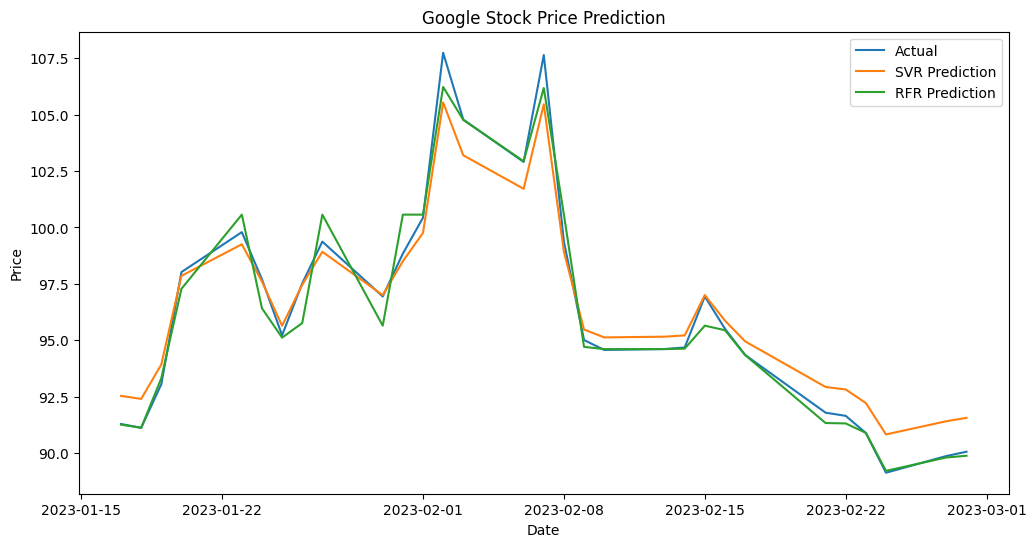

In [22]:
# Get the last 30 days of data from the original dataframe
last_30_days = df.tail(30)

# Preprocess the data by scaling it
scaled_data = scaler.transform(last_30_days)

# Reshape the scaled data to have only one feature
X = scaled_data[:, 1:].reshape(-1, 1)

# Predict the next 30 days of stock prices using the SVR model
y_svr_train_pred = svr_model.predict(X_train)
y_svr_test_pred = svr_model.predict(X_test)

# Inverse transform the predicted values to get the actual stock prices
svr_predictions = scaler.inverse_transform(np.concatenate(
    (y_svr_test_pred.reshape(-1, 1), scaled_data[:, 1:]), axis=1))[:, 0]


# Predict the next 30 days of stock prices using the SVR model
y_rfr_train_pred = rfr_model.predict(X_train)
y_rfr_test_pred = rfr_model.predict(X_test)


# Inverse transform the predicted values to get the actual stock prices
rfr_predictions = scaler.inverse_transform(np.concatenate(
    (y_rfr_test_pred.reshape(-1, 1), scaled_data[:, 1:]), axis=1))[:, 0]

# Visualize the predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(last_30_days.index, last_30_days['Close'], label='Actual')
plt.plot(last_30_days.index, svr_predictions, label='SVR Prediction')
plt.plot(last_30_days.index, rfr_predictions, label='RFR Prediction')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

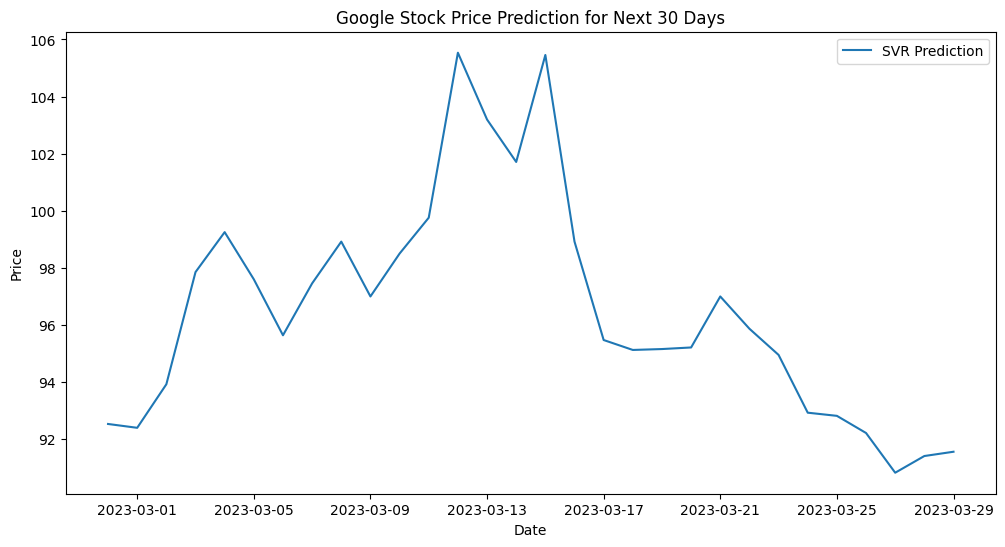

In [24]:
# Get the last 30 days of historical data
last_30_days = df[-30:]

# Scale the data using the same scaler object
last_30_days_scaled = scaler.transform(last_30_days)

# Reshape the data to be in the shape expected by the model
X_pred = last_30_days_scaled[:, 1:].reshape(-1, 1)

# Make predictions for the next 30 days using the SVR model
y_svr_pred = svr_model.predict(X_pred)

# Make predictions for the next 30 days using the RFR model
y_rfr_pred = rfr_model.predict(X_pred)

# Unscale the predictions
y_svr_pred = scaler.inverse_transform(
    np.concatenate((y_svr_pred.reshape(-1,1), last_30_days_scaled[:, 1:]), axis=1))[:,0]

# y_rfr_pred = scaler.inverse_transform(
#     np.concatenate((y_train[-30:], y_rfr_pred)))

# Create a date range for the next 30 days
date_range = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Plot the historical data and the predictions
plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Close'], label='Historical Data')
plt.plot(date_range, y_svr_pred, label='SVR Prediction')
# plt.plot(date_range, y_rfr_pred, label='RFR Prediction')
plt.title('Google Stock Price Prediction for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [25]:
from tabulate import tabulate

# Evaluate SVR model
y_svr_train_pred = svr_model.predict(X_train)
y_svr_test_pred = svr_model.predict(X_test)

svr_metrics = [
    ['R2 Score', r2_score(y_train, y_svr_train_pred),
     r2_score(y_test, y_svr_test_pred)],
    ['MSE', mean_squared_error(y_train, y_svr_train_pred),
     mean_squared_error(y_test, y_svr_test_pred)],
    ['MAE', mean_absolute_error(y_train, y_svr_train_pred), mean_absolute_error(
        y_test, y_svr_test_pred)]
]


# Evaluate RFR model
y_rfr_train_pred = rfr_model.predict(X_train)
y_rfr_test_pred = rfr_model.predict(X_test)

rfr_metrics = [
    ['R2 Score', r2_score(y_train, y_rfr_train_pred),
     r2_score(y_test, y_rfr_test_pred)],
    ['MSE', mean_squared_error(y_train, y_rfr_train_pred),
     mean_squared_error(y_test, y_rfr_test_pred)],
    ['MAE', mean_absolute_error(y_train, y_rfr_train_pred), mean_absolute_error(
        y_test, y_rfr_test_pred)]
]

# Print the evaluation metrics in a table
print(tabulate(svr_metrics, headers=[
      'Metric', 'SVR Train', 'SVR Test'], tablefmt='fancy_grid'))
print(tabulate(rfr_metrics, headers=[
      'Metric', 'RFR Train', 'RFR Test'], tablefmt='fancy_grid'))


╒══════════╤═════════════╤════════════╕
│ Metric   │   SVR Train │   SVR Test │
╞══════════╪═════════════╪════════════╡
│ R2 Score │  0.935305   │ 0.910632   │
├──────────┼─────────────┼────────────┤
│ MSE      │  0.00448773 │ 0.00330524 │
├──────────┼─────────────┼────────────┤
│ MAE      │  0.0620952  │ 0.0453023  │
╘══════════╧═════════════╧════════════╛
╒══════════╤═════════════╤═════════════╕
│ Metric   │   RFR Train │    RFR Test │
╞══════════╪═════════════╪═════════════╡
│ R2 Score │ 0.999997    │ 0.997426    │
├──────────┼─────────────┼─────────────┤
│ MSE      │ 1.83632e-07 │ 9.51843e-05 │
├──────────┼─────────────┼─────────────┤
│ MAE      │ 0.000180611 │ 0.00514223  │
╘══════════╧═════════════╧═════════════╛


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


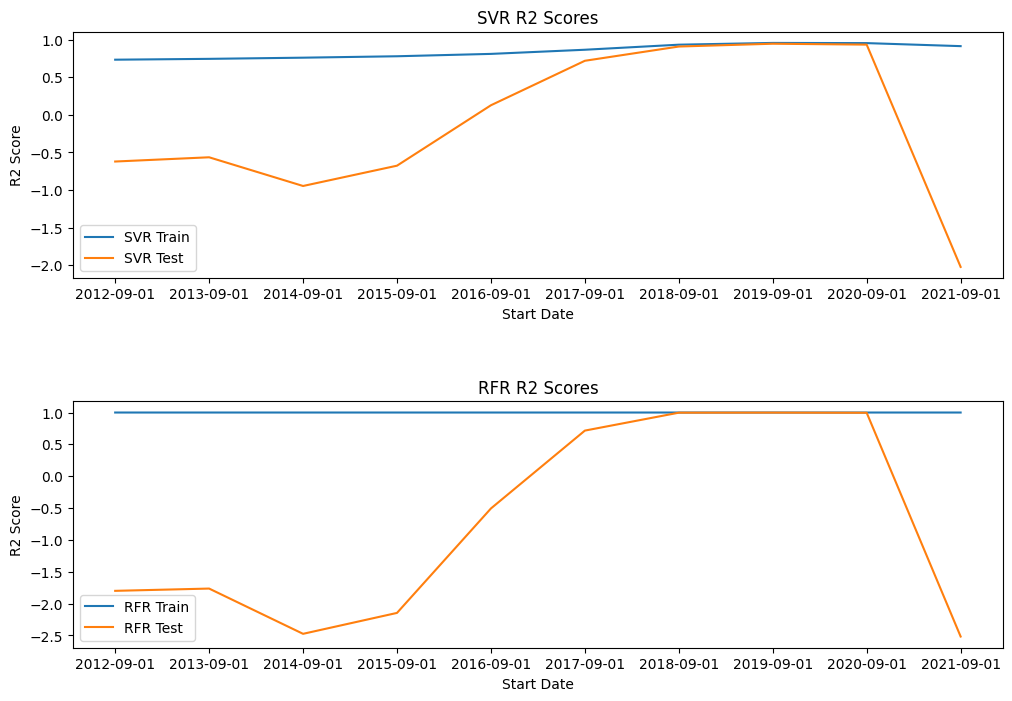

In [1]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tabulate import tabulate

# Set end date for historical price data
end_date = '2023-03-01'

# Set different start dates
start_dates = ['2012-09-01', '2013-09-01', '2014-09-01',
               '2015-09-01', '2016-09-01', '2017-09-01',
               '2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01']

# Create empty lists to store R2 scores for each start date
svr_r2_scores = []
rfr_r2_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
for i, start_date in enumerate(start_dates):
    df = yf.download("GOOGL", start=start_date, end=end_date)

    # Drop unnecessary columns
    df.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df)

    # Split the data into training and testing sets
    train_size = int(len(df_scaled) * 0.7)
    train_data, test_data = df_scaled[0:train_size, :], df_scaled[train_size:len(df_scaled), :]

    # Split the data into input (X) and output (y) variables
    X_train, y_train = train_data[:, 1:], train_data[:, 0]
    X_test, y_test = test_data[:, 1:], test_data[:, 0]

    # Build SVR model
    svr_model = SVR(kernel='linear', C=100, gamma='auto')
    svr_model.fit(X_train, y_train)

    # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rfr_model.fit(X_train, y_train)

    # Test the models and evaluate R2 scores
    svr_r2_train = svr_model.score(X_train, y_train)
    svr_r2_test = svr_model.score(X_test, y_test)

    rfr_r2_train = rfr_model.score(X_train, y_train)
    rfr_r2_test = rfr_model.score(X_test, y_test)

    # Append the R2 scores to the lists
    svr_r2_scores.append([start_date, svr_r2_train, svr_r2_test])
    rfr_r2_scores.append([start_date, rfr_r2_train, rfr_r2_test])

# Create dataframes from the lists of R2 scores
svr_r2_df = pd.DataFrame(svr_r2_scores, columns=['start_date', 'svr_r2_train', 'svr_r2_test'])
rfr_r2_df = pd.DataFrame(rfr_r2_scores, columns=['start_date', 'rfr_r2_train', 'rfr_r2_test'])

# Create line charts for the R2 scores
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Set x-axis to be the start dates
x = svr_r2_df['start_date']

# Set y-axis to be the R2 scores
y_svr_train = svr_r2_df['svr_r2_train']
y_svr_test = svr_r2_df['svr_r2_test']
y_rfr_train = rfr_r2_df['rfr_r2_train']
y_rfr_test = rfr_r2_df['rfr_r2_test']

# Create line charts for the SVR R2 scores
axs[0].plot(x, y_svr_train, label='SVR Train')
axs[0].plot(x, y_svr_test, label='SVR Test')
axs[0].set_title('SVR R2 Scores')
axs[0].set_xlabel('Start Date')
axs[0].set_ylabel('R2 Score')
axs[0].legend()

# Create line charts for the RFR R2 scores
axs[1].plot(x, y_rfr_train, label='RFR Train')
axs[1].plot(x, y_rfr_test, label='RFR Test')
axs[1].set_title('RFR R2 Scores')
axs[1].set_xlabel('Start Date')
axs[1].set_ylabel('R2 Score')
axs[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


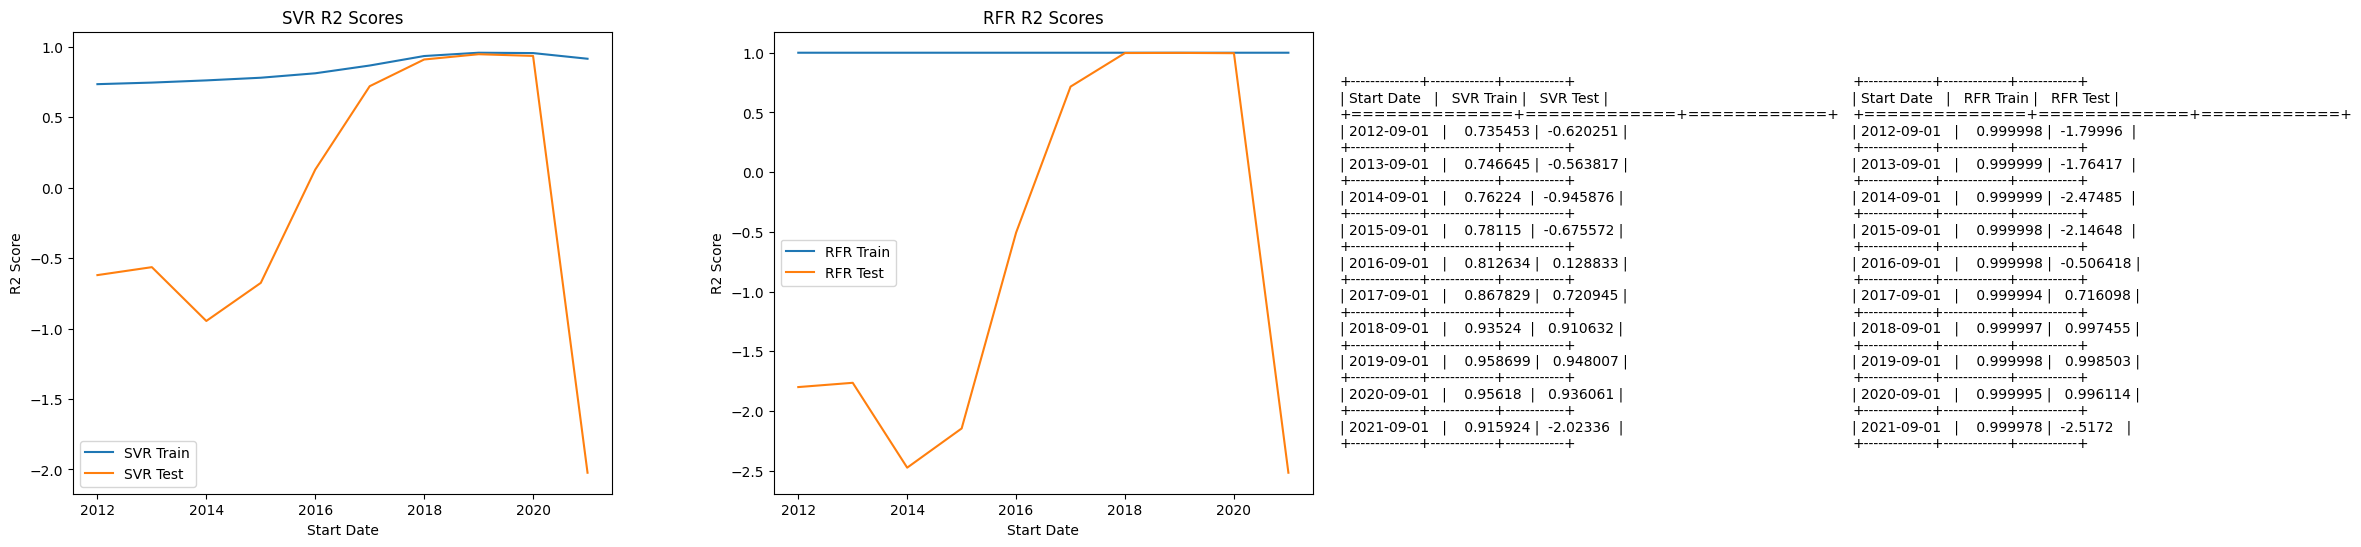

In [1]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tabulate import tabulate

# Set end date for historical price data
end_date = '2023-03-01'

# Set different start dates
start_dates = ['2012-09-01', '2013-09-01', '2014-09-01',
               '2015-09-01', '2016-09-01', '2017-09-01',
               '2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01']

# Create empty lists to store R2 scores for each start date
svr_r2_scores = []
rfr_r2_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
for i, start_date in enumerate(start_dates):
    df = yf.download("GOOGL", start=start_date, end=end_date)

    # Drop unnecessary columns
    df.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df)

    # Split the data into training and testing sets
    train_size = int(len(df_scaled) * 0.7)
    train_data, test_data = df_scaled[0:train_size, :], df_scaled[train_size:len(df_scaled), :]

    # Split the data into input (X) and output (y) variables
    X_train, y_train = train_data[:, 1:], train_data[:, 0]
    X_test, y_test = test_data[:, 1:], test_data[:, 0]

    # Build SVR model
    svr_model = SVR(kernel='linear', C=100, gamma='auto')
    svr_model.fit(X_train, y_train)

    # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rfr_model.fit(X_train, y_train)

    # Test the models and evaluate R2 scores
    svr_r2_train = svr_model.score(X_train, y_train)
    svr_r2_test = svr_model.score(X_test, y_test)

    rfr_r2_train = rfr_model.score(X_train, y_train)
    rfr_r2_test = rfr_model.score(X_test, y_test)

    # Append the R2 scores to the lists
    svr_r2_scores.append([start_date, svr_r2_train, svr_r2_test])
    rfr_r2_scores.append([start_date, rfr_r2_train, rfr_r2_test])

# Create dataframes from the lists of R2 scores
svr_r2_df = pd.DataFrame(svr_r2_scores, columns=['start_date', 'svr_r2_train', 'svr_r2_test'])
rfr_r2_df = pd.DataFrame(rfr_r2_scores, columns=['start_date', 'rfr_r2_train', 'rfr_r2_test'])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Set x-axis to be the start dates
x = pd.to_datetime(svr_r2_df['start_date']).dt.year

# Set y-axis to be the R2 scores
y_svr_train = svr_r2_df['svr_r2_train']
y_svr_test = svr_r2_df['svr_r2_test']
y_rfr_train = rfr_r2_df['rfr_r2_train']
y_rfr_test = rfr_r2_df['rfr_r2_test']

# Create line charts for the SVR R2 scores
axs[0].plot(x, y_svr_train, label='SVR Train')
axs[0].plot(x, y_svr_test, label='SVR Test')
axs[0].set_title('SVR R2 Scores')
axs[0].set_xlabel('Start Date')
axs[0].set_ylabel('R2 Score')
axs[0].legend()

# Create line charts for the RFR R2 scores
axs[1].plot(x, y_rfr_train, label='RFR Train')
axs[1].plot(x, y_rfr_test, label='RFR Test')
axs[1].set_title('RFR R2 Scores')
axs[1].set_xlabel('Start Date')
axs[1].set_ylabel('R2 Score')
axs[1].legend()

# Generate the table as a string
svr_table = tabulate(svr_r2_df.sort_values('start_date')[['start_date', 'svr_r2_train', 'svr_r2_test']].values.tolist(), headers=['Start Date', 'SVR Train', 'SVR Test'], tablefmt='grid')
rfr_table = tabulate(rfr_r2_df.sort_values('start_date')[['start_date', 'rfr_r2_train', 'rfr_r2_test']].values.tolist(), headers=['Start Date', 'RFR Train', 'RFR Test'], tablefmt='grid')

# Display the table in the second subplot
axs[1].text(1.05, 0.5, svr_table, transform=axs[1].transAxes, fontsize=10, verticalalignment='center')
axs[1].text(2.0, 0.5, rfr_table, transform=axs[1].transAxes, fontsize=10, verticalalignment='center')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the figure
plt.show()


